<a href="https://colab.research.google.com/github/Yomex139/NLP/blob/main/Disaster_tweet_project_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check for GPU

**import libraries**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


import random as ran
import os

In [ ]:
#sue code to check if we the system is connected to GPU
# !nvidia-smi -L
!nvidia-smi

Sun Sep 10 15:29:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

*downloading* Helper function

In [ ]:
#download helper function from my github account
!wget https://github.com/Yomex139/Food-Vision/raw/main/Helper_Function.py

--2023-09-10 19:54:51--  https://github.com/Yomex139/Food-Vision/raw/main/Helper_Function.py
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Yomex139/Food-Vision/main/Helper_Function.py [following]
--2023-09-10 19:54:52--  https://raw.githubusercontent.com/Yomex139/Food-Vision/main/Helper_Function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13113 (13K) [text/plain]
Saving to: ‘Helper_Function.py’

Helper_Function.py  100%[===================>]  12.81K  --.-KB/s    in 0s      

2023-09-10 19:54:52 (123 MB/s) - ‘Helper_Function.py’ saved [13113/13113]



In [ ]:
#importing libraries from helper function
from Helper_Function import pred_and_plot,unzip_data,create_tensorboard_callback

<!-- Get dataset -->

Get dataset
you can get the dataset here:(tweet)[https://www.kaggle.com/datasets/vstepanenko/disaster-tweets/download?datasetVersionNumber=3]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# unzip data
unzip_data('nlp_getting_started.zip')

--2023-09-10 19:54:55--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   739KB/s    in 0.8s    

2023-09-10 19:54:56 (739 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



Visualize dataset(NLP dataset)

In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

In [ ]:
train_df['text'][25]

"No way...I can't eat that shit"

In [ ]:
# set random seed
# tf.random.set_seed(42)
# shuffle our data
train_df_shuffle = train_df.sample(frac=1,random_state=42)
train_df_shuffle

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df),len(test_df)

(7613, 3263)

In [ ]:
# visualize random train sample
import random
randon_index = random.randint(0,len(train_df))
for row in train_df_shuffle[['text','target']][randon_index:randon_index+15].itertuples():
  _,text,target = row
  print(f'Target:{target}','(real disaster)' if target>0 else '(not real disater)')
  print(f'Text\n{text}\n')
  print('\n----\n')

Target:0 (not real disater)
Text
I heard the steven universe theme song from upstairs and screamed his name at the part of the song and scared my cousin


----

Target:0 (not real disater)
Text
at the lake 
*sees a dead fish*
me: poor little guy i wonder what happened
ashley: idk maybe it drowned
  wtf ????????


----

Target:1 (real disaster)
Text
Suicide bombing for Da'esh is (rightly) despicable. Suicide bombing for Ocalan/ Marxism?

= They share 'our values'. https://t.co/Gs0km0vlgk


----

Target:0 (not real disater)
Text
This Govt of Hubris has small maj yet acts as if it has a landslide. Opposition req'd with vision rigour &amp; hunger to serve this democracy.


----

Target:0 (not real disater)
Text
My @MLG and food worlds have collided in this @ijustine salmon video. #simple #Alaskaseafood #askforalaska https://t.co/2SnyGHaiVs


----

Target:1 (real disaster)
Text
Rainstorm Destroys 600 Houses In Yobe | iReporter https://t.co/0rNY349UnT via @sharethis


----

Target:0 (not rea

split dataset into traning and validation dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_sentence,val_sentence,train_label,val_label = train_test_split(train_df_shuffle['text'].to_numpy(),
                                                                      train_df_shuffle['target'].to_numpy(),
                                                                      test_size=.1,
                                                                      random_state=42)

In [ ]:
len(train_sentence),len(val_sentence),len(train_label),len(val_label)

(6851, 762, 6851, 762)

Text Vectorization(Tokinization)---Converting text to number

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization()
text_vectorizer.adapt(train_sentence)

In [ ]:
# find the average number of tokens in training dataset
round(sum([len(i.split()) for i in train_sentence])/len(train_sentence))


15

In [ ]:
max_token=10000
max_length = 15
# set text vectorizer variable
text_vectorizers = TextVectorization(max_tokens=max_token,
                                     output_sequence_length=max_length)

In [ ]:
# fit the text vectorizer to train sentence
text_vectorizers.adapt(data=train_sentence)

sentence = ["there's no flood in my street!"]
my_text = text_vectorizers(sentence)
my_text

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,  40, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

Creating embindding using embedding layer

In [ ]:

from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_token,
                             output_dim=128,
                             input_length=max_length)

In [ ]:
sample_emb = embedding(my_text)
sample_emb

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01073933, -0.04480845, -0.01121181, ...,  0.02868288,
         -0.04649407, -0.00034015],
        [-0.03840737,  0.03651245,  0.01920749, ..., -0.02405158,
         -0.03898209, -0.03032896],
        [ 0.02464545,  0.03619046,  0.02497294, ..., -0.02137952,
          0.01542265, -0.03906201],
        ...,
        [-0.00689006,  0.02317147, -0.02983991, ..., -0.04092466,
          0.00716057, -0.01671899],
        [-0.00689006,  0.02317147, -0.02983991, ..., -0.04092466,
          0.00716057, -0.01671899],
        [-0.00689006,  0.02317147, -0.02983991, ..., -0.04092466,
          0.00716057, -0.01671899]]], dtype=float32)>

In [ ]:
random_sentence = random.choice(train_df_shuffle['text'])
text_vec = text_vectorizers(random_sentence)
random_emb = embedding(text_vec)
print(f'\noriginal Text:\n\n{random_sentence}\n')
print(f'\nembedded Text:\n\n{random_emb}\n')


original Text:

As wild fires blacken northern California parched Harris County becomes tinder box.  https://t.co/i2lwTy5YuP


embedded Text:

[[ 0.04392583 -0.02367954  0.02844686 ...  0.04929003 -0.01981666
  -0.00837327]
 [ 0.02222959 -0.00643132 -0.03097985 ...  0.01380191  0.01059826
  -0.00514035]
 [-0.03024522 -0.02118402  0.04569611 ...  0.01161363 -0.01415249
   0.04643418]
 ...
 [ 0.04032813 -0.04514675  0.04536716 ... -0.00629665 -0.03330066
  -0.00878222]
 [-0.01055515 -0.00704781  0.02329774 ... -0.02252456 -0.0132801
  -0.00294961]
 [-0.01055515 -0.00704781  0.02329774 ... -0.02252456 -0.0132801
  -0.00294961]]



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
# create the model(baseline model)
model_0 = Pipeline([
                    ('Tdid',TfidfVectorizer()),
                    ('clf',MultinomialNB())
])
# fit the model
model_0.fit(train_sentence,train_label)
# evaluate the model
score = model_0.score(val_sentence,val_label)
print(f'Baseline model achieved accuracy:{score*100:.3f}%')

Baseline model achieved accuracy:79.265%


In [ ]:
# making prediction
base_pred = model_0.predict(val_sentence)
base_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
# create function to evaluate base model pridictions
def text_metrics(y_true,y_pred):
  from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix,accuracy_score,precision_recall_fscore_support
import seaborn as sns
  print(f'\nrecall score:{recall_score(y_true=y_true,y_pred=y_pred)*100:.2f}%\n')
  print(f'\nprecision_score:{precision_score(y_true=y_true,y_pred=y_pred)*100:.2f}%\n')
  print(f'\nf1_score:{f1_score(y_true=y_true,y_pred=y_pred)*100:.2f}%\n')
  print(f'\nthe confusion matrix:\n\n{confusion_matric}\n')
  print(f'\naccuracy score:{accuracy_score(y_true,y_pred)*100:.2f}%\n')
  print(f'\nmore beautiful matrix:{sns.heatmap(data=confusion_matric,annot=True)}\n')



In [ ]:
precision_recall_fscore_support(val_label,base_pred)

(array([0.74806202, 0.88617886]),
 array([0.93236715, 0.62643678]),
 array([0.83010753, 0.73400673]),
 array([414, 348]))


recall score:62.64%


precision_score:88.62%


f1_score:73.40%


the confusion matrix:

[[386  28]
 [130 218]]


accuracy score:79.27%


more beautiful matrix:Axes(0.125,0.11;0.62x0.77)



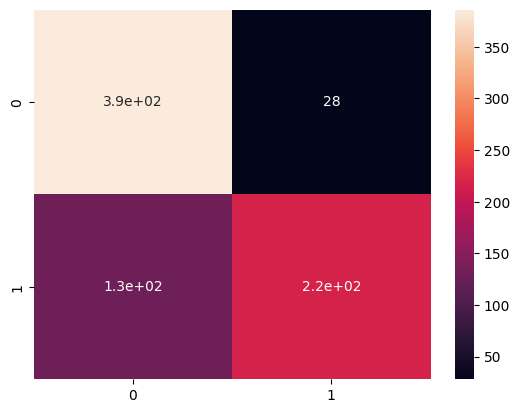

In [ ]:
text_metrics(y_true=val_label,y_pred=base_pred)

In [ ]:
from Helper_Function import create_tensorboard_callback

In [ ]:
callback_01 = create_tensorboard_callback(dir_name='NLP callback',
                            experiment_name='model 1 experiment')

Saving TensorBoard log files to: NLP callback/model 1 experiment/20230910-152955


In [ ]:
train_sentence[:20
               ],train_label

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt',
        'Lava Dragon Breeder! I j

In [ ]:
# Create model 1
input = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizers(input)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(1,activation='sigmoid')(x)
model_01 = tf.keras.Model(input,output)

model_01.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer='adam',
                 metrics=['accuracy'])

model_01.fit(x=train_sentence,
             y=train_label,
             epochs=20,
             validation_data=(val_sentence,val_label),
             callbacks=callback_01)

Epoch 1/20
215/215 [==============================] - 21s 76ms/step - loss: 0.6120 - accuracy: 0.6878 - val_loss: 0.5382 - val_accuracy: 0.7533
Epoch 2/20
215/215 [==============================] - 4s 17ms/step - loss: 0.4424 - accuracy: 0.8168 - val_loss: 0.4702 - val_accuracy: 0.7913
Epoch 3/20
215/215 [==============================] - 2s 9ms/step - loss: 0.3467 - accuracy: 0.8584 - val_loss: 0.4570 - val_accuracy: 0.7940
Epoch 4/20
215/215 [==============================] - 2s 9ms/step - loss: 0.2849 - accuracy: 0.8908 - val_loss: 0.4639 - val_accuracy: 0.7900
Epoch 5/20
215/215 [==============================] - 2s 8ms/step - loss: 0.2376 - accuracy: 0.9115 - val_loss: 0.4810 - val_accuracy: 0.7822
Epoch 6/20
215/215 [==============================] - 2s 8ms/step - loss: 0.2020 - accuracy: 0.9296 - val_loss: 0.5003 - val_accuracy: 0.7822
Epoch 7/20
215/215 [==============================] - 1s 5ms/step - loss: 0.1733 - accuracy: 0.9396 - val_loss: 0.5299 - val_accuracy: 0.7900
Epo

In [ ]:
predict = model_01.predict(val_sentence)
mod01_pred = tf.round(tf.squeeze(predict))

24/24 [==============================] - 0s 2ms/step



recall score:69.83%


precision_score:75.70%


f1_score:72.65%


the confusion matrix:

[[386  28]
 [130 218]]


accuracy score:75.98%


more beautiful matrix:Axes(0.125,0.11;0.62x0.77)



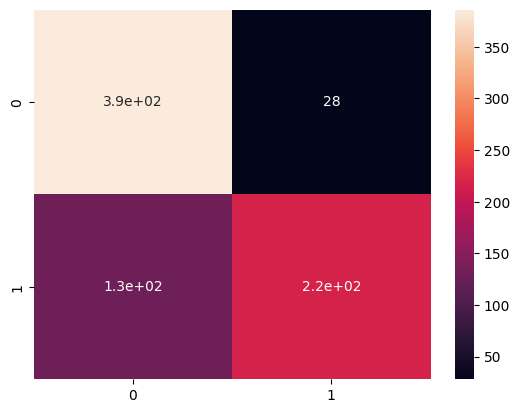

In [ ]:
text_metrics(y_true=val_label,y_pred=mod01_pred)

In [ ]:
model_01.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.

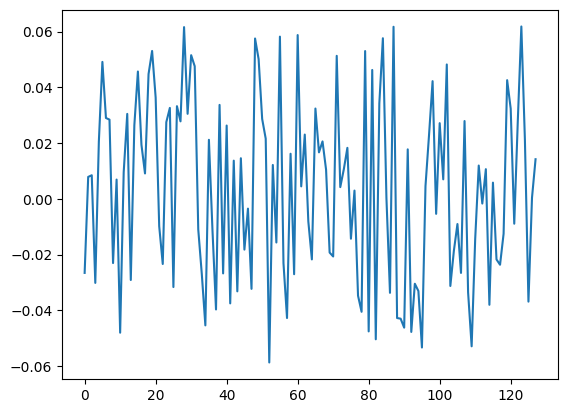

In [ ]:
plt.plot(model_01.get_layer('embedding').get_weights()[0][0])

In [ ]:
print(x.shape)

(None, 128)


In [ ]:
# Model 2 LSTM(Long Short Term Memory)
# Build the model
input = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizers(input)
x = embedding(x)
x = layers.LSTM(units=64,return_sequences=True)(x)
x = layers.LSTM(units=64)(x)
x = layers.Dense(units=64,activation='relu')(x)
output = layers.Dense(1,activation='sigmoid')(x)
model_02 = tf.keras.Model(input,output)


In [ ]:
# Compiling the model
model_02.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics='accuracy')

In [ ]:
#Fit the model
model_02.fit(x=train_sentence,
             y=train_label,
             epochs=10,
             validation_data=(val_sentence,val_label),
             callbacks=create_tensorboard_callback(dir_name='NLP callback',experiment_name='LSTM model'))

Saving TensorBoard log files to: NLP callback/LSTM model/20230910-153050
Epoch 1/10
215/215 [==============================] - 18s 56ms/step - loss: 0.1050 - accuracy: 0.9715 - val_loss: 1.0740 - val_accuracy: 0.7677
Epoch 2/10
215/215 [==============================] - 3s 15ms/step - loss: 0.0586 - accuracy: 0.9756 - val_loss: 1.0608 - val_accuracy: 0.7612
Epoch 3/10
215/215 [==============================] - 2s 10ms/step - loss: 0.0515 - accuracy: 0.9794 - val_loss: 1.2144 - val_accuracy: 0.7638
Epoch 4/10
215/215 [==============================] - 3s 12ms/step - loss: 0.0472 - accuracy: 0.9788 - val_loss: 1.4214 - val_accuracy: 0.7638
Epoch 5/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0444 - accuracy: 0.9807 - val_loss: 1.5223 - val_accuracy: 0.7585
Epoch 6/10
215/215 [==============================] - 4s 17ms/step - loss: 0.0415 - accuracy: 0.9812 - val_loss: 1.5935 - val_accuracy: 0.7572
Epoch 7/10
215/215 [==============================] - 2s 11ms/step -

In [ ]:
LSTM_pred = model_02.predict(val_sentence)
LSTM_pred = tf.round(tf.squeeze(LSTM_pred))
LSTM_pred

24/24 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0


recall score:70.69%


precision_score:73.87%


f1_score:72.25%


the confusion matrix:

[[386  28]
 [130 218]]


accuracy score:75.20%


more beautiful matrix:Axes(0.125,0.11;0.62x0.77)



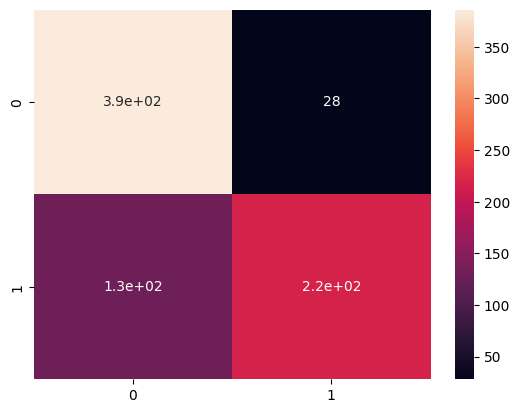

In [ ]:
text_metrics(val_label,LSTM_pred)

In [ ]:
model_02.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                           

In [ ]:
# Building model 3(GRU)
input = layers.Input(shape=(1,),dtype='string')
x = text_vectorizers(input)
x = embedding(x)
x = layers.GRU(128,return_sequences=True)(x)
x = layers.GRU(64,return_sequences=False)(x)
x = layers.Dense(64,activation=tf.keras.activations.tanh)(x)
output = layers.Dense(1,activation='sigmoid')(x)
model_03 = tf.keras.Model(input,output)

In [ ]:
# Conpile the model
model_03.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer='adam',
                 metrics='accuracy')

In [ ]:
#Fit the model
model_03.fit(x=train_sentence,
             y=train_label,
             epochs=10,
             validation_data=(val_sentence,val_label),
             callbacks=create_tensorboard_callback(dir_name='NLP callback',
                                                   experiment_name='GRU model'))

Saving TensorBoard log files to: NLP callback/GRU model/20230910-153136
Epoch 1/10
215/215 [==============================] - 17s 60ms/step - loss: 0.0862 - accuracy: 0.9712 - val_loss: 1.3115 - val_accuracy: 0.7612
Epoch 2/10
215/215 [==============================] - 4s 20ms/step - loss: 0.0511 - accuracy: 0.9796 - val_loss: 1.0881 - val_accuracy: 0.7559
Epoch 3/10
215/215 [==============================] - 2s 10ms/step - loss: 0.0479 - accuracy: 0.9806 - val_loss: 1.0016 - val_accuracy: 0.7612
Epoch 4/10
215/215 [==============================] - 2s 10ms/step - loss: 0.0444 - accuracy: 0.9810 - val_loss: 1.1037 - val_accuracy: 0.7559
Epoch 5/10
215/215 [==============================] - 2s 9ms/step - loss: 0.0475 - accuracy: 0.9810 - val_loss: 1.2845 - val_accuracy: 0.7598
Epoch 6/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0382 - accuracy: 0.9813 - val_loss: 1.3717 - val_accuracy: 0.7507
Epoch 7/10
215/215 [==============================] - 2s 9ms/step - los

In [ ]:
#Model 3 prediction
GRU_pred = model_03.predict(val_sentence)
GRU_pred =tf.round(tf.squeeze(GRU_pred))
GRU_pred

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0


recall score:70.11%


precision_score:76.01%


f1_score:72.94%


the confusion matrix:

[[386  28]
 [130 218]]


accuracy score:76.25%


more beautiful matrix:Axes(0.125,0.11;0.62x0.77)



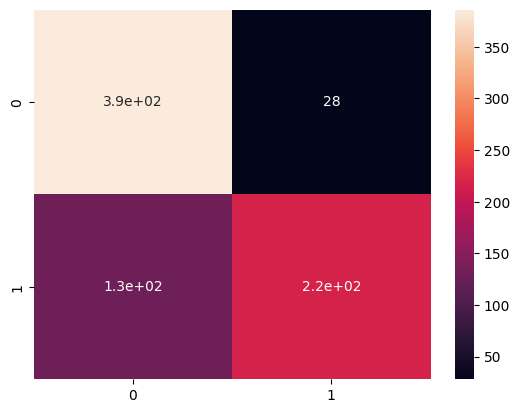

In [ ]:
text_metrics(val_label,GRU_pred)

In [ ]:
# Building model 4(Bidirectional)
# Create the model
input = layers.Input(shape=(1,),dtype='string')
x = text_vectorizers(input)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(128,return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(128,return_sequences=False))(x)
output = layers.Dense(1,activation='sigmoid')(x)
model_04 = tf.keras.Model(input,output)



In [ ]:
model_04.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 15, 256)           263168    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               296448    
 onal)                                                           
                                                           

In [ ]:
# Compile the mode
model_04.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')

In [ ]:
#fit the model
model_04.fit(x=train_sentence,
                 y=train_label,
                 epochs=5,
                 validation_data=(val_sentence,val_label),
                 callbacks=create_tensorboard_callback(dir_name='NLP callback',
                                                       experiment_name='Birectional model'))

Saving TensorBoard log files to: NLP callback/Birectional model/20230910-153216
Epoch 1/5
215/215 [==============================] - 21s 63ms/step - loss: 0.0656 - accuracy: 0.9758 - val_loss: 1.3003 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0388 - accuracy: 0.9822 - val_loss: 1.5378 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0343 - accuracy: 0.9822 - val_loss: 1.8739 - val_accuracy: 0.7520
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0321 - accuracy: 0.9823 - val_loss: 1.6813 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0350 - accuracy: 0.9834 - val_loss: 1.8406 - val_accuracy: 0.7612


In [ ]:
Bi_pred = model_04.predict(val_sentence)
Bi_pred = tf.round(tf.squeeze(Bi_pred))
Bi_pred

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
val_label.shape,Bi_pred.shape

((762,), TensorShape([762]))


recall score:68.10%


precision_score:76.95%


f1_score:72.26%


the confusion matrix:

[[386  28]
 [130 218]]


accuracy score:76.12%


more beautiful matrix:Axes(0.125,0.11;0.62x0.77)



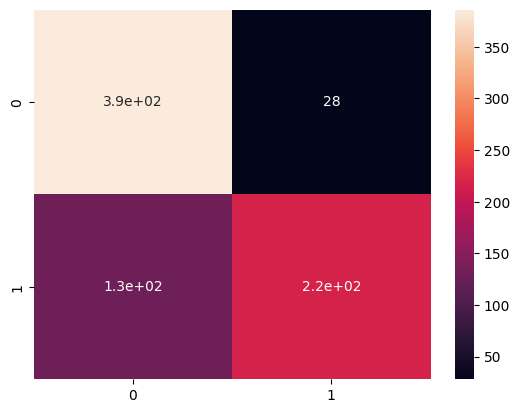

In [ ]:
text_metrics(val_label,Bi_pred)

In [ ]:
# Building model 5 with Convolution neural network(CNN)
input = layers.Input(shape=(1,),dtype='string')
x = text_vectorizers(input)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size=5,activation='relu')(x)
x = layers.LSTM(units=128,return_sequences=True)(x)

x = layers.MaxPool1D()(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(1,activation='sigmoid')(x)
model_05 = tf.keras.Model(input,output)

In [ ]:
# Check model summary
model_05.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 lstm_3 (LSTM)               (None, 11, 128)           98816     
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 128)            0         
 D)                                                        

In [ ]:
# Compile the model
model_05.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')

In [ ]:
# Fit the model
model_05.fit(x=train_sentence,
             y=train_label,
             epochs=5,
             validation_data=(val_sentence,val_label),
             callbacks=create_tensorboard_callback(dir_name='NLP callback',
                                                   experiment_name='Con1D model'))

Saving TensorBoard log files to: NLP callback/Con1D model/20230910-153305
Epoch 1/5
215/215 [==============================] - 19s 54ms/step - loss: 0.1223 - accuracy: 0.9565 - val_loss: 1.0849 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0605 - accuracy: 0.9756 - val_loss: 1.1160 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0474 - accuracy: 0.9790 - val_loss: 1.4976 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0399 - accuracy: 0.9810 - val_loss: 1.5923 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0352 - accuracy: 0.9841 - val_loss: 1.6094 - val_accuracy: 0.7585


In [ ]:
# model_5 predictions
CONV_pred = model_05.predict(val_sentence)
CONV_pred = tf.round(tf.squeeze(CONV_pred))
CONV_pred

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0


recall score:69.25%


precision_score:75.79%


f1_score:72.37%


the confusion matrix:

[[386  28]
 [130 218]]


accuracy score:75.85%


more beautiful matrix:Axes(0.125,0.11;0.62x0.77)



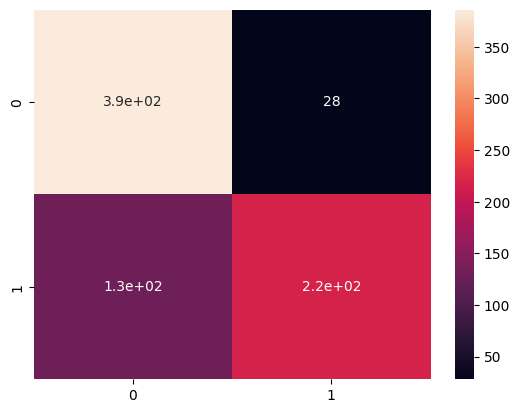

In [ ]:
text_metrics(val_label,CONV_pred)

In [ ]:
# Building model 6 leaveraging on transfer learning from tensorflow
import tensorflow_hub as hub
sentence_encoder = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                  trainable=False,
                                  input_shape=[],
                                  dtype='string',
                                  name='USE_hub')



In [ ]:
model_6 = tf.keras.Sequential([
                               sentence_encoder,
                              layers.Dense(128,activation='relu'),
                               layers.Dense(64,activation='tanh'),
                               layers.Dense(1,activation='sigmoid')
])

In [ ]:
# model 6 summary
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE_hub (KerasLayer)        (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256871809 (979.89 MB)
Trainable params: 73985 (289.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Copiling the model
model_6.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics='accuracy')

In [ ]:
# Fit the model
model_6.fit(x=train_sentence,
            y=train_label,
            validation_data=(val_sentence,val_label),
            epochs=5,
            callbacks=create_tensorboard_callback(dir_name='NLP callback',
                                                  experiment_name='USE model from tensorflow hub'))

Saving TensorBoard log files to: NLP callback/USE model from tensorflow hub/20230910-153354
Epoch 1/5
215/215 [==============================] - 9s 15ms/step - loss: 0.4617 - accuracy: 0.7885 - val_loss: 0.4444 - val_accuracy: 0.8071
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3919 - accuracy: 0.8266 - val_loss: 0.4329 - val_accuracy: 0.8150
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3589 - accuracy: 0.8416 - val_loss: 0.4353 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3162 - accuracy: 0.8666 - val_loss: 0.4445 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2667 - accuracy: 0.8908 - val_loss: 0.4916 - val_accuracy: 0.8215


In [ ]:
pred_prob = model_6.predict(val_sentence)
pred_prob = tf.squeeze(pred_prob)
pred_prob

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1.51476160e-01, 2.70073801e-01, 9.99697447e-01, 6.48910701e-02,
       3.38535517e-01, 7.98551083e-01, 9.97786999e-01, 9.97411907e-01,
       9.82543528e-01, 1.41769703e-02, 4.13508803e-01, 2.01740265e-01,
       8.64442810e-02, 1.61223829e-01, 1.06097639e-01, 1.28937121e-02,
       4.10960346e-01, 1.30555242e-01, 8.87939781e-02, 3.16466957e-01,
       9.96557355e-01, 5.54738104e-01, 2.02526644e-01, 3.03774700e-03,
       9.59612131e-01, 9.99915361e-01, 1.09367603e-02, 6.22474812e-02,
       1.31300017e-01, 1.74773827e-01, 3.56168300e-01, 9.17541921e-01,
       2.08835259e-01, 1.66630149e-01, 7.54832685e-01, 2.87290573e-01,
       9.98492360e-01, 2.09121704e-02, 1.87221682e-03, 9.99511123e-01,
       2.15330478e-02, 5.42386353e-01, 6.40632749e-01, 1.35127246e-01,
       1.91752687e-01, 9.88780618e-01, 7.86743835e-02, 9.66120422e-01,
       4.62383002e-01, 7.54736483e-01, 4.91009727e-02, 6.45881712e-01,
       1.72329515e-01, 2.7717

In [ ]:
# model 6 predictions
USE_pred = model_6.predict(val_sentence)
USE_pred = tf.round(tf.squeeze(USE_pred))
USE_pred

24/24 [==============================] - 0s 9ms/step


<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0


recall score:71.26%


precision_score:87.32%


f1_score:78.48%


the confusion matrix:

[[386  28]
 [130 218]]


accuracy score:82.15%


more beautiful matrix:Axes(0.125,0.11;0.62x0.77)



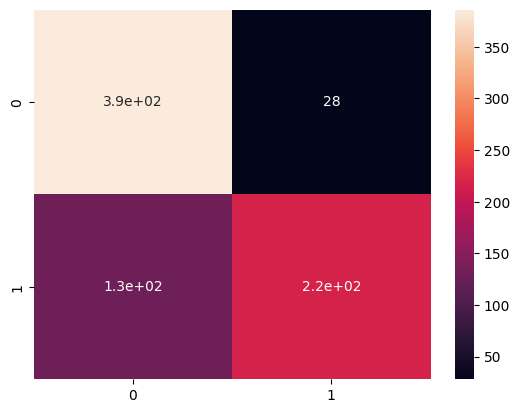

In [ ]:
text_metrics(val_label,USE_pred)

In [ ]:
# use 10% of the dataset to leavearage on tensorflow hub transfer learning
train_df_10 = train_df_shuffle[['text','target']].sample(frac=.1)
train_df_10.head(),len(train_df_10)

(                                                   text  target
 3379  Updated #RockyFire map with Mandatory Evacuati...       1
 3671  Wow fatality on 101 big rig hit motorcyclist b...       1
 3524  WFTV Eyewitness News: TN school psychologist a...       0
 7379  Texas Seeks Comment on Rules for Changes to Wi...       0
 2622  REPUBLICAN STYLED ECONOMIC DESTRUCTION | Under...       0,
 761)

In [ ]:
train_sentence_10 = train_df_10['text'].to_list()
train_label_10 = train_df_10['target'].to_list()

In [ ]:
train_sentence_10[:10],train_label_10[:10]

(['Updated #RockyFire map with Mandatory Evacuation areas (red) Advisory Evacuation (yellow) 2 Evac Centers (green) https://t.co/gZEgjoAKKw',
  "Wow fatality on 101 big rig hit motorcyclist blood everywhere ?? wow. I'm sick.",
  'WFTV Eyewitness News: TN school psychologist arrested in Florida on child porn charges http://t.co/lgGLf5yrMe',
  'Texas Seeks Comment on Rules for Changes to Windstorm Insurer http://t.co/BNNIdfZWbd',
  'REPUBLICAN STYLED ECONOMIC DESTRUCTION | Undergroundbestsellers http://t.co/dILi5JhMur',
  'Sad that biker beatdown derailed his pro-democracy work as @NYPDnews undercover: http://t.co/iHHRKG4V1S. http://t.co/aryU5qNgJJ',
  'The Pak terrorist who has been caught alive must be tried fast not delayed as KasabWe must send very hard message to Pak instead of Biryani',
  'Investigators have said a Virgin Galactic spaceship crash was caused by structural failure after the co-pilot ... http://t.co/WC69XAJIs4',
  '@joshcorman  #infosec rather you knew it or not your 

In [ ]:
# Create model 7
model_07 = tf.keras.models.clone_model(model_6)

# Compile the model
model_07.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [ ]:
model_07.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE_hub (KerasLayer)        (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256871809 (979.89 MB)
Trainable params: 73985 (289.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_07.fit(x=train_sentence_10,
             y=train_label_10,
             epochs=10,
             validation_data=(val_sentence,val_label),
             callbacks=create_tensorboard_callback(dir_name='NLP callback',
                                                   experiment_name='USE 10% of the data'))

Saving TensorBoard log files to: NLP callback/USE 10% of the data/20230910-153421
Epoch 1/10
24/24 [==============================] - 5s 44ms/step - loss: 0.6348 - accuracy: 0.6689 - val_loss: 0.5736 - val_accuracy: 0.7598
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.4624 - accuracy: 0.8173 - val_loss: 0.4732 - val_accuracy: 0.7927
Epoch 3/10
24/24 [==============================] - 1s 22ms/step - loss: 0.3645 - accuracy: 0.8292 - val_loss: 0.4672 - val_accuracy: 0.7861
Epoch 4/10
24/24 [==============================] - 1s 25ms/step - loss: 0.3009 - accuracy: 0.8699 - val_loss: 0.4749 - val_accuracy: 0.7848
Epoch 5/10
24/24 [==============================] - 1s 26ms/step - loss: 0.2429 - accuracy: 0.9041 - val_loss: 0.5089 - val_accuracy: 0.7848
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.1944 - accuracy: 0.9330 - val_loss: 0.5311 - val_accuracy: 0.7782
Epoch 7/10
24/24 [==============================] - 1s 22ms/step - loss:

In [ ]:
USE_pred_10 = model_07.predict(val_sentence)
USE_pred_10 = tf.round(tf.squeeze(USE_pred_10))
USE_pred_10

24/24 [==============================] - 1s 15ms/step


<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
# avoidding data leakage
train_10_perc = int(.1*len(train_sentence))
train_10_perc

685

In [ ]:
train_sent_10 = train_sentence[:train_10_perc]
train_label_10 = train_label[:train_10_perc]


In [ ]:
model_08 = tf.keras.models.clone_model(model_6)

model_08.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

model_08.fit(x=train_sent_10,
             y=train_label_10,
             epochs=10,
             validation_data=(val_sentence,val_label),
             callbacks=create_tensorboard_callback(dir_name='NLP callback',
                                                   experiment_name='avoid data leakage on same model_data'))

Saving TensorBoard log files to: NLP callback/avoid data leakage on same model_data/20230910-153440
Epoch 1/10
22/22 [==============================] - 4s 47ms/step - loss: 0.6347 - accuracy: 0.6628 - val_loss: 0.5824 - val_accuracy: 0.7467
Epoch 2/10
22/22 [==============================] - 1s 27ms/step - loss: 0.4730 - accuracy: 0.8190 - val_loss: 0.4815 - val_accuracy: 0.7822
Epoch 3/10
22/22 [==============================] - 1s 27ms/step - loss: 0.3792 - accuracy: 0.8350 - val_loss: 0.4892 - val_accuracy: 0.7795
Epoch 4/10
22/22 [==============================] - 1s 27ms/step - loss: 0.3126 - accuracy: 0.8730 - val_loss: 0.5110 - val_accuracy: 0.7703
Epoch 5/10
22/22 [==============================] - 1s 27ms/step - loss: 0.2626 - accuracy: 0.8978 - val_loss: 0.5468 - val_accuracy: 0.7664
Epoch 6/10
22/22 [==============================] - 1s 40ms/step - loss: 0.2093 - accuracy: 0.9343 - val_loss: 0.5683 - val_accuracy: 0.7520
Epoch 7/10
22/22 [==============================] - 1s

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
!tensorboard dev upload \
--logdir '/content/NLP callback/' \
--name 'My model experiments on NLP dataset' \
--description 'comparison of various model experiments' \
--one_shot

2023-09-10 15:34:54.813514: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/NLP callback/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) no


In [ ]:
!tensorboard dev list

2023-09-10 15:58:57.430254: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   YPG-DYY-PXS


https://tensorboard.dev/experiment/NUvc4bnUQSmkJx90ESqm6w/
	Name                 My model experiments on NL

In [ ]:
tf.keras.models.save_model(filepath='Save model format',model=model_6)

In [ ]:
model_6.save(filepath='model/best model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model(filepath='/content/model/best model.h5',
                                          custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
loaded_model.evaluate(val_sentence,val_label)

24/24 [==============================] - 1s 11ms/step - loss: 0.4916 - accuracy: 0.8215


[0.49160557985305786, 0.8215222954750061]

In [ ]:
dataframe = pd.DataFrame({
              'text':val_sentence,
              'target':val_label,
              'predictions':USE_pred,
              'pred_prob':pred_prob
})

In [ ]:
dataframe

,text,target,predictions,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.151476
1,FedEx no longer to transport bioterror germs i...,0,0.0,0.270074
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.999697
3,@camilacabello97 Internally and externally scr...,1,0.0,0.064891
4,Radiation emergency #preparedness starts with ...,1,0.0,0.338536
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.018514
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.062924
759,FedEx will no longer transport bioterror patho...,0,0.0,0.287301
760,Crack in the path where I wiped out this morni...,0,1.0,0.675329


In [ ]:
most_wrong = dataframe[dataframe['target']!=dataframe['predictions']].sort_values('pred_prob',ascending=False)

In [ ]:
for rows in most_wrong[:5].itertuples():
  _,text,target,predictions,pred_prob=rows
  print(f'\nTarget:{target} Prediction:{predictions} Pred_prob:{pred_prob:.4f}\n')
  print(f'\nText:{text}\n')
  print('---------\n')


Target:0 Prediction:1.0 Pred_prob:0.9984


Text:[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

---------


Target:0 Prediction:1.0 Pred_prob:0.9803


Text:@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

---------


Target:0 Prediction:1.0 Pred_prob:0.9431


Text:@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

---------


Target:0 Prediction:1.0 Pred_prob:0.9376


Text:Deaths 3 http://t.co/nApviyGKYK

---------


Target:0 Prediction:1.0 Pred_prob:0.9285


Text:the windstorm blew thru my open window and now my bong is in pieces just another example of nature's indifference to human suffering

---------



In [ ]:
test_sentence = test_df['text'].to_list()

In [ ]:
test_sentence[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

In [ ]:
test_pred = model_6.predict(test_sentence)

102/102 [==============================] - 1s 10ms/step


In [ ]:
model_6.predict(['The main reason I like [Twitter] as a source of data is that it integrates not just a measure of typical exposure — which is ‘Did the water come onto the land in a place where it wasn’t supposed to be? [It also] measures ‘What are people noticing? What are people talking about?’ Twitter can give us this aggregated measure of what those social consequences of that particular flood are.'])

1/1 [==============================] - 0s 65ms/step


array([[0.1629888]], dtype=float32)

In [ ]:
# Create model 1
input = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizers(input)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(1,activation='sigmoid')(x)
model_01 = tf.keras.Model(input,output)

In [ ]:
from keras.api._v2.keras.layers import GlobalAveragePooling1D
# Create model 1 using sequecial API
import tensorflow as tf
model_1 = tf.keras.Sequential()
model_1.add(layers.Input(shape=(1,),dtype='string'))
model_1.add(text_vectorizers)
model_1.add(embedding)
model_1.add(layers.GlobalAveragePooling1D())
model_1.add(layers.Dense(1,activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model_1.fit(train_sentence,
            train_label,
            epochs=10,
            validation_data=(val_sentence,val_label))


Epoch 1/10
215/215 [==============================] - 18s 62ms/step - loss: 0.6103 - accuracy: 0.6906 - val_loss: 0.5371 - val_accuracy: 0.7520
Epoch 2/10
215/215 [==============================] - 4s 17ms/step - loss: 0.4411 - accuracy: 0.8181 - val_loss: 0.4737 - val_accuracy: 0.7835
Epoch 3/10
215/215 [==============================] - 2s 9ms/step - loss: 0.3468 - accuracy: 0.8609 - val_loss: 0.4590 - val_accuracy: 0.7887
Epoch 4/10
215/215 [==============================] - 2s 11ms/step - loss: 0.2837 - accuracy: 0.8910 - val_loss: 0.4639 - val_accuracy: 0.7900
Epoch 5/10
215/215 [==============================] - 3s 13ms/step - loss: 0.2377 - accuracy: 0.9142 - val_loss: 0.4788 - val_accuracy: 0.7874
Epoch 6/10
215/215 [==============================] - 2s 7ms/step - loss: 0.2002 - accuracy: 0.9295 - val_loss: 0.5027 - val_accuracy: 0.7900
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1718 - accuracy: 0.9410 - val_loss: 0.5342 - val_accuracy: 0.7835
E

In [ ]:
model = tf.keras.Sequential([
                             layers.Input(shape=(1,),dtype='string'),
                             text_vectorizers,
                             embedding,
                             layers.GlobalAveragePooling1D(),
                             layers.Dense(1,activation='sigmoid')

])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_sentence,
          train_label,
          epochs=5,
          validation_data=(val_sentence,val_label))

Epoch 1/5
215/215 [==============================] - 12s 54ms/step - loss: 0.4969 - accuracy: 0.8583 - val_loss: 0.4935 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3010 - accuracy: 0.9178 - val_loss: 0.4622 - val_accuracy: 0.7940
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2253 - accuracy: 0.9329 - val_loss: 0.4733 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1836 - accuracy: 0.9429 - val_loss: 0.4954 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1558 - accuracy: 0.9530 - val_loss: 0.5207 - val_accuracy: 0.7795


In [ ]:
model.predict(['During natural disasters, Twitter has tools such as Moments and Lists that can be used to create a centralized source of credible information. '])

1/1 [==============================] - 0s 132ms/step


array([[0.02240354]], dtype=float32)